## Лабораторна робота №1
### Метод глобальної бінаризації
Виконав студент групи ФІ-31 Дремко Олександр

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Функції

In [2]:
# Функція для конвертації зображення в ч/б
def convert_to_grayscale(image):
    # Конвертує кольорове зображення у градації сірого за формулою: 0.36*R + 0.53*G + 0.11*B
    grayscale_image = np.dot(image[..., :3], [0.299, 0.587, 0.114])
    return grayscale_image.astype(np.uint8)

# Функція для підрахунку гістограм (Підраховуємо кількість пікселів кожної інтенсивності (0-255))
def calculate_histogram(grayscale_image):
    histogram = np.zeros(256)
    for pixel in grayscale_image.flatten():
        histogram[pixel] += 1
    return histogram

# Реалізація методу Отсу
def otsu_binarization(grayscale_image):
    
    histogram = calculate_histogram(grayscale_image) # Кількість пікселів для кожної інтенсивності
    total_pixels = grayscale_image.size  # Загальна кількість пікселів
    sum_total = np.dot(np.arange(256), histogram)  # Сума всіх інтенсивностей пікселів
    
    sum_bg = 0  # Сума інтенсивностей для фону
    weight_bg = 0  # Вага фону (кількість пікселів фону)
    max_variance = 0  # Максимальна міжкласова дисперсія
    threshold = 0  # Знайдений поріг

    weight_fg = 0  # Вага переднього плану (кількість пікселів об'єкта)

    for i in range(256):
        weight_bg += histogram[i]  # Кількість пікселів у фоні
        if weight_bg == 0:
            continue

        weight_fg = total_pixels - weight_bg  # Кількість пікселів у передньому плані
        if weight_fg == 0:
            break

        sum_bg += i * histogram[i]  # Сума інтенсивностей фону
        mean_bg = sum_bg / weight_bg  # Середня інтенсивність фону
        mean_fg = (sum_total - sum_bg) / weight_fg  # Середня інтенсивність переднього плану

        # Обчислюємо міжкласову дисперсію
        variance_between = weight_bg * weight_fg * (mean_bg - mean_fg) ** 2

        # Якщо знайдено більшу дисперсію, оновлюємо поріг
        if variance_between > max_variance:
            max_variance = variance_between
            threshold = i

    # Бінаризація зображення за знайденим порогом
    binary_mask = (grayscale_image >= threshold).astype(np.uint8) * 255

    return binary_mask


# Функція для вирізання об'єкта за допомогою бінарної маски
def extract_object(original_image, mask):
    
    # Інвертуємо маску, щоб об'єкт був білим (255), а фон чорним (0)
    inverse_mask = cv2.bitwise_not(mask)
    
    # Використовуємо інверсовану маску для збереження об'єкта
    result = cv2.bitwise_and(original_image, original_image, mask=inverse_mask)
    return result

## Використаня

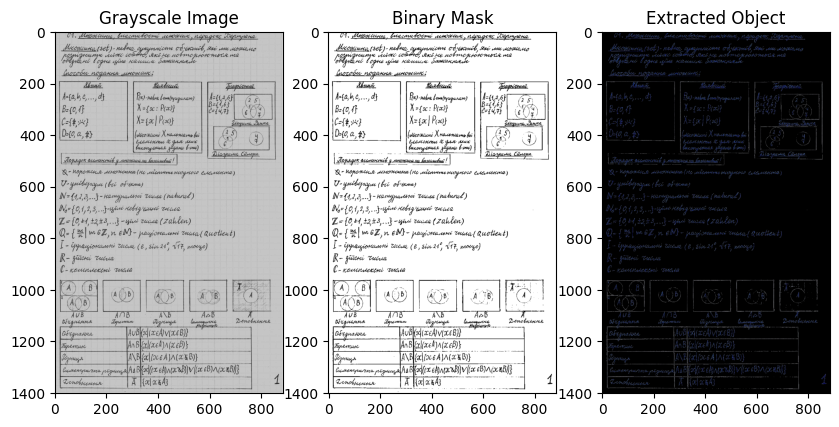

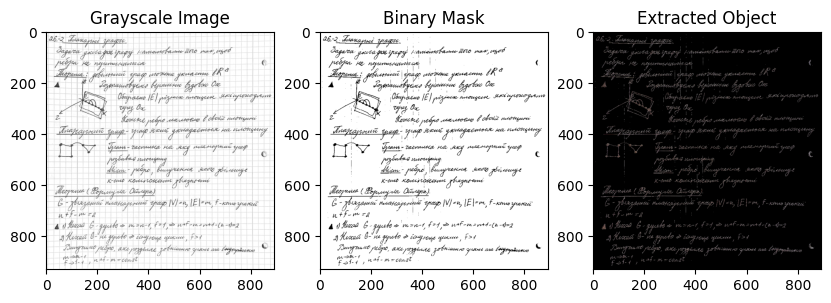

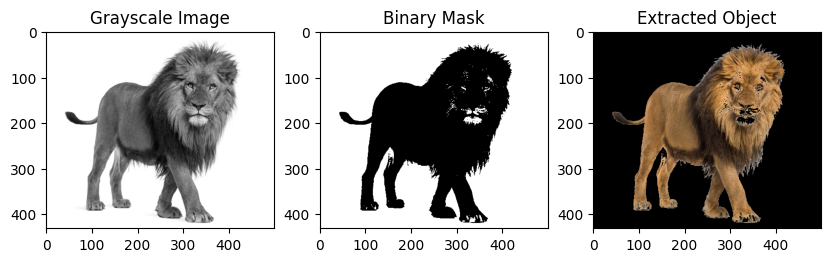

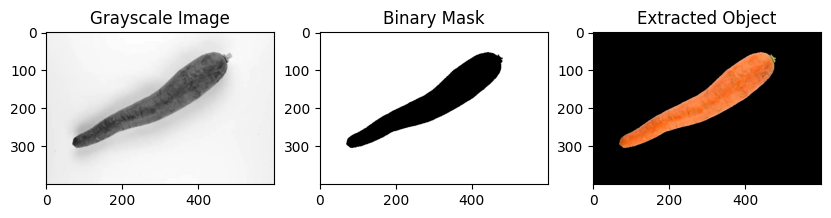

In [3]:
image_paths = ["text_image1.jpg", "text_image2.jpg", "object_image1.jpg", "object_image2.jpg"]
for image_path in image_paths:
    # Оригінальне зображення
    original_image = cv2.imread(image_path)
    
    # Конвертація в ч/б
    grayscale_image = convert_to_grayscale(original_image)
    
    # Застосування методу Отсу
    binary_mask = otsu_binarization(grayscale_image)
    
    # Вирізання об'єкта
    extracted_object = extract_object(original_image, binary_mask)
    
    # Збереження результатів
    grayscale_output_path = f"grayscale_{image_path}"
    binary_output_path = f"binary_{image_path}"
    extracted_output_path = f"extracted_{image_path}"
    
    cv2.imwrite(grayscale_output_path, grayscale_image)
    cv2.imwrite(binary_output_path, binary_mask)
    cv2.imwrite(extracted_output_path, extracted_object)

    # Відображення результатів
    plt.figure(figsize=(10, 10))
    
    plt.subplot(1, 3, 1)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Grayscale Image')
    
    plt.subplot(1, 3, 2)
    plt.imshow(binary_mask, cmap='gray')
    plt.title('Binary Mask')
    
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(extracted_object, cv2.COLOR_BGR2RGB))
    plt.title('Extracted Object')
    
    plt.show()